In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl

In [2]:
df = pd.read_csv("customer_churn.csv")
print(df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [3]:
balance_mean = df['Balance'].mean()
estimated_mean = df['EstimatedSalary'].mean()

print(balance_mean)
print(estimated_mean)

class1_feat_vecs = np.array([df['Balance']]) 
class2_feat_vecs = np.array([df['EstimatedSalary']]) 

centroid1 = class1_feat_vecs.mean(axis=0)
centroid2 = class2_feat_vecs.mean(axis=0)

spread1 = class1_feat_vecs.std(axis=0)
spread2 = class2_feat_vecs.std(axis=0)

interclass_distance = np.linalg.norm(centroid1 - centroid2)

print(f"Centroid of Class 1: {centroid1}, Spread: {spread1}")
print(f"Centroid of Class 2: {centroid2}, Spread: {spread2}")
print(f"Interclass Distance: {interclass_distance}")

76485.889288
100090.239881
Centroid of Class 1: [     0.    83807.86 159660.8  ...      0.    75075.31 130142.79], Spread: [0. 0. 0. ... 0. 0. 0.]
Centroid of Class 2: [101348.88 112542.58 113931.57 ...  42085.58  92888.52  38190.78], Spread: [0. 0. 0. ... 0. 0. 0.]
Interclass Distance: 8755283.918815907


c:\Users\Harshith\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


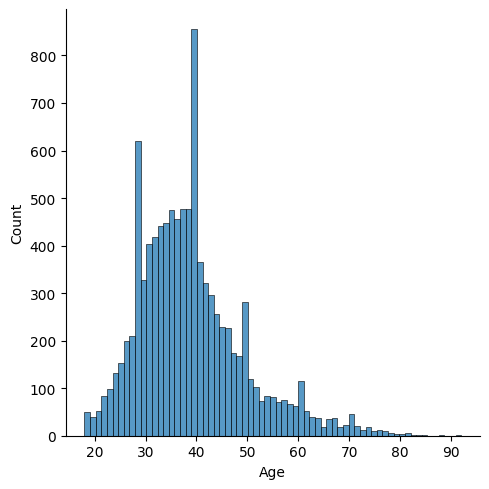

In [5]:
import seaborn as sns
sns.displot(df['Age'])

plt.show()

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df_encoded = pd.get_dummies(df, drop_first=True)
features = df_encoded.drop(columns=['Exited'], axis=1)
target = df_encoded['Exited']
column_names = features.columns

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
features_scaled = pd.DataFrame(scaled_features, columns=column_names)


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

x_train, x_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=0)

knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(x_train, y_train)
knn_predictions = knn_classifier.predict(x_test)

accuracy = accuracy_score(y_test, knn_predictions)
confusion_mat = confusion_matrix(y_test, knn_predictions)
classification_rep = classification_report(y_test, knn_predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.729
Confusion Matrix:
[[2074  305]
 [ 508  113]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.84      2379
           1       0.27      0.18      0.22       621

    accuracy                           0.73      3000
   macro avg       0.54      0.53      0.53      3000
weighted avg       0.69      0.73      0.71      3000



In [8]:
x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(features_scaled, target, test_size=0.3, random_state=0)

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(x_train_split, y_train_split)
knn_predictions = knn_classifier.predict(x_test_split)

accuracy_split = accuracy_score(y_test_split, knn_predictions)
confusion_mat_split = confusion_matrix(y_test_split, knn_predictions)
classification_rep_split = classification_report(y_test_split, knn_predictions)

print("Accuracy:", accuracy_split)
print("Confusion Matrix:")
print(confusion_mat_split)
print("Classification Report:")
print(classification_rep_split)


Accuracy: 0.7656666666666667
Confusion Matrix:
[[2248  131]
 [ 572   49]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      2379
           1       0.27      0.08      0.12       621

    accuracy                           0.77      3000
   macro avg       0.53      0.51      0.49      3000
weighted avg       0.69      0.77      0.71      3000

